In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
from geopy.geocoders import Nominatims
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [37]:
df = pd.read_csv('layoffs_data.csv')
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Zoomo,Sydney,Transportation,27.0,0.08,2023-05-02,https://www.businessnewsaustralia.com/articles...,105.0,Series B,2023-05-02 16:26:35,Australia,Unknown
1,Lev,New York City,Real Estate,34.0,NaN,2023-05-01,https://therealdeal.com/new-york/2023/05/01/cr...,114.0,Series B,2023-05-01 23:51:06,United States,Unknown
2,PharmEasy,Mumbai,Healthcare,NaN,NaN,2023-05-01,https://www.dealstreetasia.com/stories/pharmea...,1600.0,Unknown,2023-05-02 16:23:27,India,Unknown
3,Cogito,New Delhi,Data,177.0,NaN,2023-04-29,https://inc42.com/buzz/protests-erupt-data-sta...,NaN,Unknown,2023-05-01 14:36:18,India,Unknown
4,Cue Health,San Diego,Healthcare,326.0,0.30,2023-04-28,https://www.sec.gov/Archives/edgar/data/162894...,899.0,Post-IPO,2023-05-01 23:57:54,United States,https://docs.google.com/spreadsheets/d/1P5d2Cr...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2553 non-null   object 
 1   Location_HQ                 2553 non-null   object 
 2   Industry                    2553 non-null   object 
 3   Laid_Off_Count              1752 non-null   float64
 4   Percentage                  1699 non-null   float64
 5   Date                        2551 non-null   object 
 6   Source                      2553 non-null   object 
 7   Funds_Raised                2302 non-null   float64
 8   Stage                       2553 non-null   object 
 9   Date_Added                  2553 non-null   object 
 10  Country                     2553 non-null   object 
 11  List_of_Employees_Laid_Off  2552 non-null   object 
dtypes: float64(3), object(9)
memory usage: 239.5+ KB


In [39]:
layoffs_df = df[['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage', 'Date', 'Country']].copy()

In [40]:
layoffs_df['Date'] = pd.to_datetime(layoffs_df['Date'])
layoffs_df['year'] = layoffs_df['Date'].dt.strftime('%Y')
layoffs_df['mon-year'] = layoffs_df['Date'].dt.strftime("%Y-%m")

In [41]:
layoffs_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Country,year,mon-year
0,Zoomo,Sydney,Transportation,27.0,0.08,2023-05-02,Australia,2023,2023-05
1,Lev,New York City,Real Estate,34.0,NaN,2023-05-01,United States,2023,2023-05
2,PharmEasy,Mumbai,Healthcare,NaN,NaN,2023-05-01,India,2023,2023-05
3,Cogito,New Delhi,Data,177.0,NaN,2023-04-29,India,2023,2023-04
4,Cue Health,San Diego,Healthcare,326.0,0.30,2023-04-28,United States,2023,2023-04


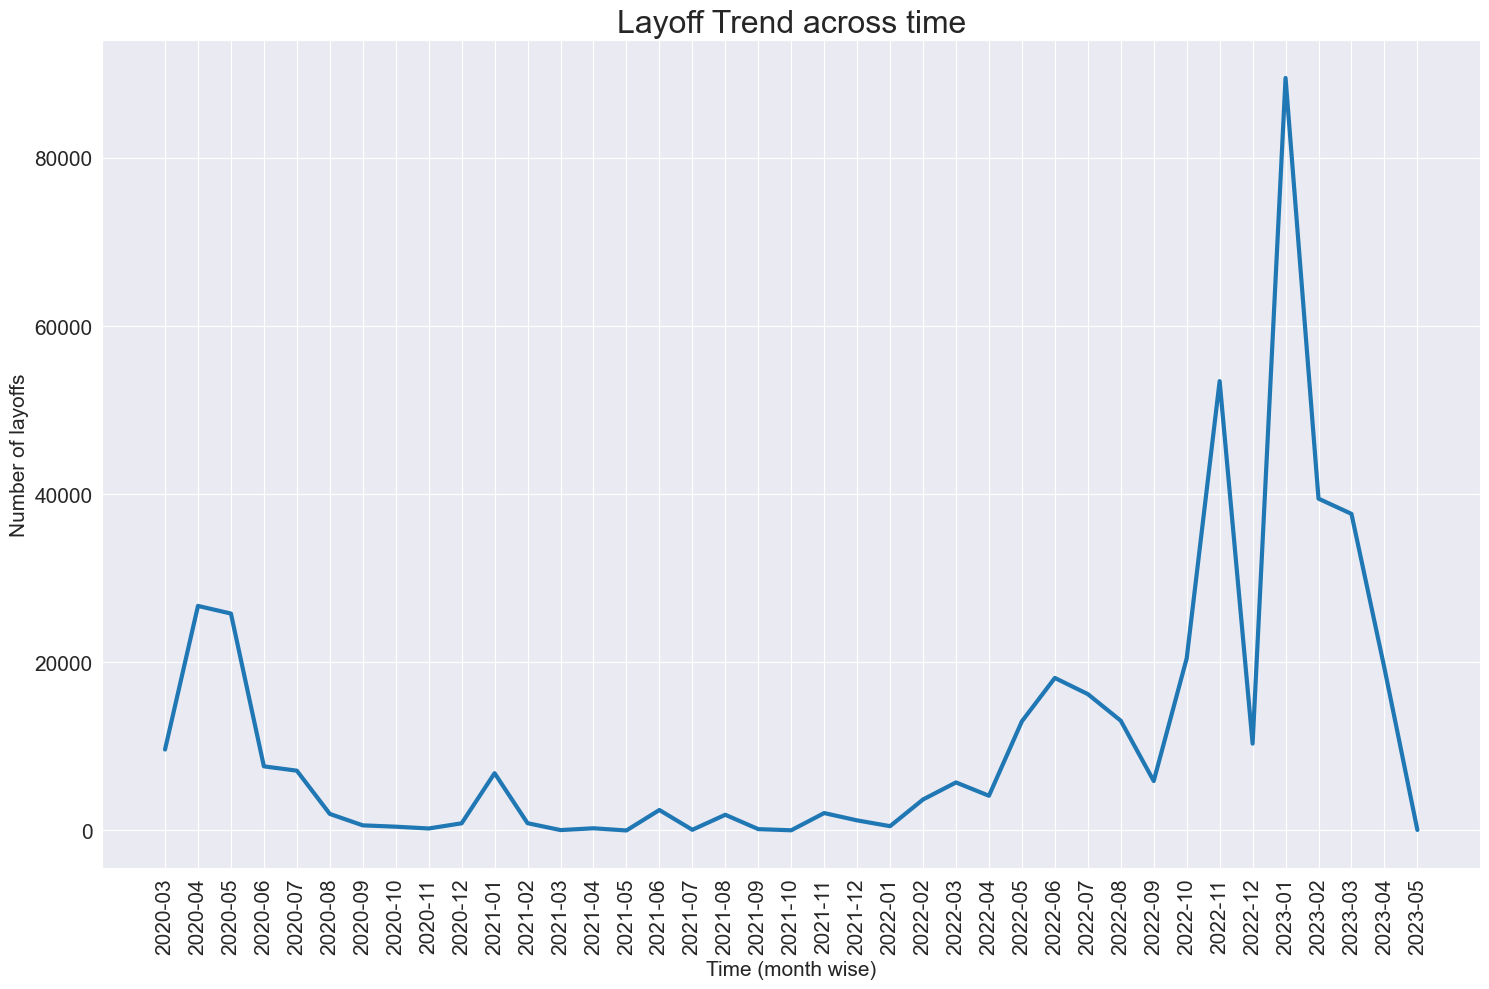

In [42]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.lineplot(x='mon-year', y='Laid_Off_Count', data=layoffs_df.groupby('mon-year').sum().reset_index()[['mon-year','Laid_Off_Count']],linewidth=3)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='Time (month wise)', fontsize=15)
plt.ylabel(ylabel='Number of layoffs', fontsize=15)
plt.title('Layoff Trend across time', fontsize=23)
plt.tight_layout()
plt.show()

In [43]:
layoffs_df['Percentage'] = layoffs_df['Percentage']*100
layoffs_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Country,year,mon-year
0,Zoomo,Sydney,Transportation,27.0,8.0,2023-05-02,Australia,2023,2023-05
1,Lev,New York City,Real Estate,34.0,NaN,2023-05-01,United States,2023,2023-05
2,PharmEasy,Mumbai,Healthcare,NaN,NaN,2023-05-01,India,2023,2023-05
3,Cogito,New Delhi,Data,177.0,NaN,2023-04-29,India,2023,2023-04
4,Cue Health,San Diego,Healthcare,326.0,30.0,2023-04-28,United States,2023,2023-04


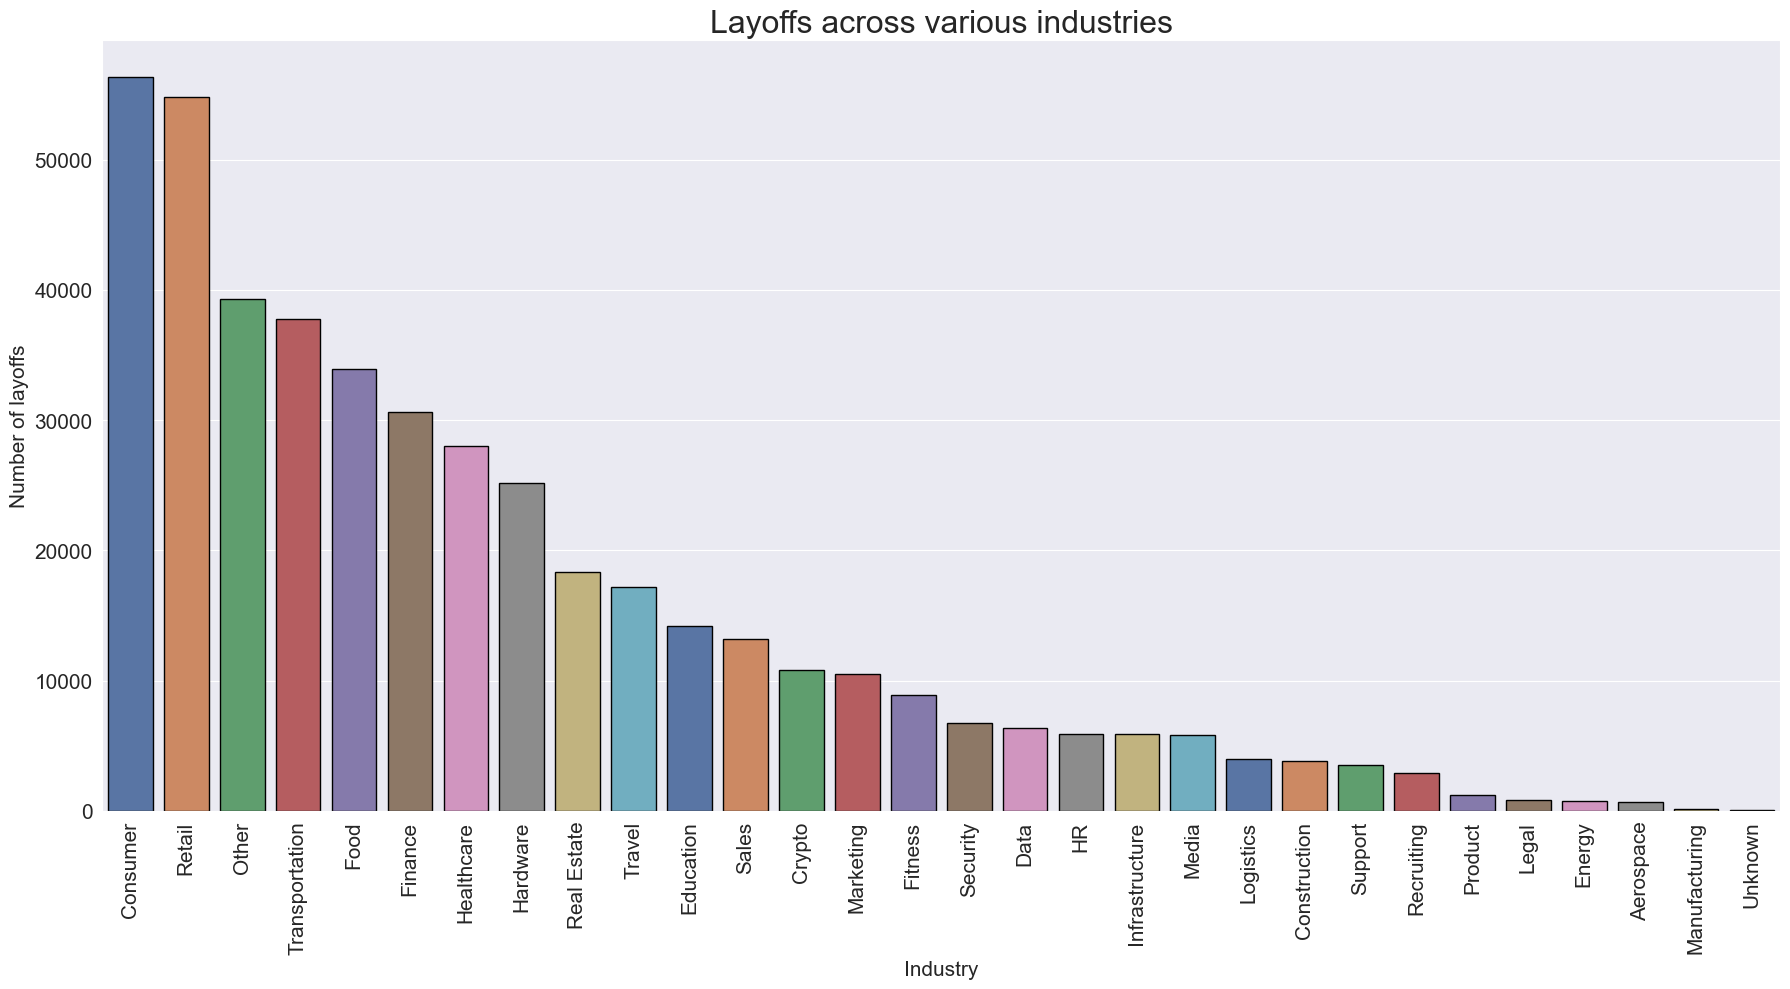

In [44]:

sns.set_style('darkgrid')
plt.figure(figsize=(18,10))
sns.barplot(x='Industry', y='Laid_Off_Count', data=layoffs_df.groupby('Industry').sum().sort_values('Laid_Off_Count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='Industry', fontsize=15)
plt.ylabel(ylabel='Number of layoffs', fontsize=15)
plt.title('Layoffs across various industries', fontsize=23)
plt.tight_layout()
plt.show()

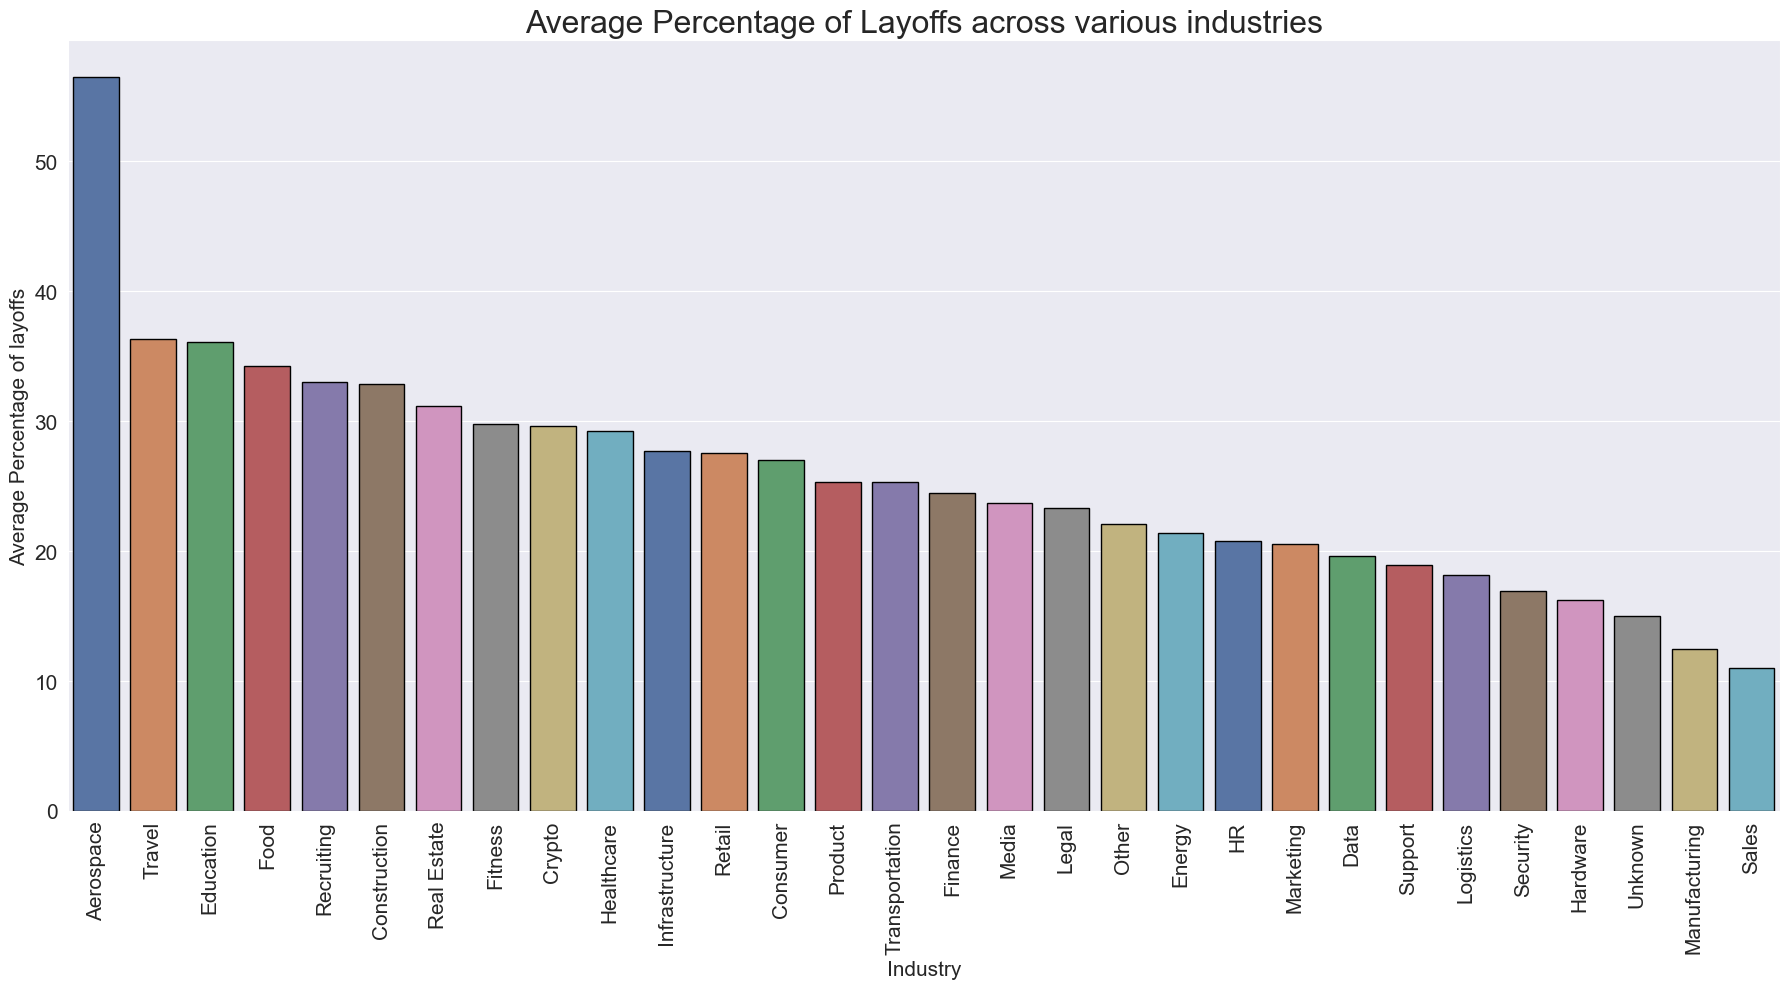

In [45]:
order = layoffs_df.groupby('Industry').mean()['Percentage'].reset_index().sort_values('Percentage', ascending=False)['Industry']
plt.figure(figsize=(18,10))
sns.set_style('darkgrid')
sns.barplot(x='Industry', y='Percentage', data=layoffs_df.sort_values('Percentage', ascending=False), 
            order = order, ci=None, palette='deep',linewidth=1,edgecolor='black')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='Industry', fontsize=15)
plt.ylabel(ylabel='Average Percentage of layoffs', fontsize=15)
plt.title('Average Percentage of Layoffs across various industries', fontsize=23)
plt.tight_layout()
plt.show()

In [46]:
laidOff_countByCountry = layoffs_df.groupby('Country', as_index=False).sum()

In [47]:
layoffs_df = layoffs_df[layoffs_df['Laid_Off_Count'].notna()] #removing null values

In [48]:
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria', 'Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']
n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']
africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

In [49]:
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]
nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]
africa_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]
oceania_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]

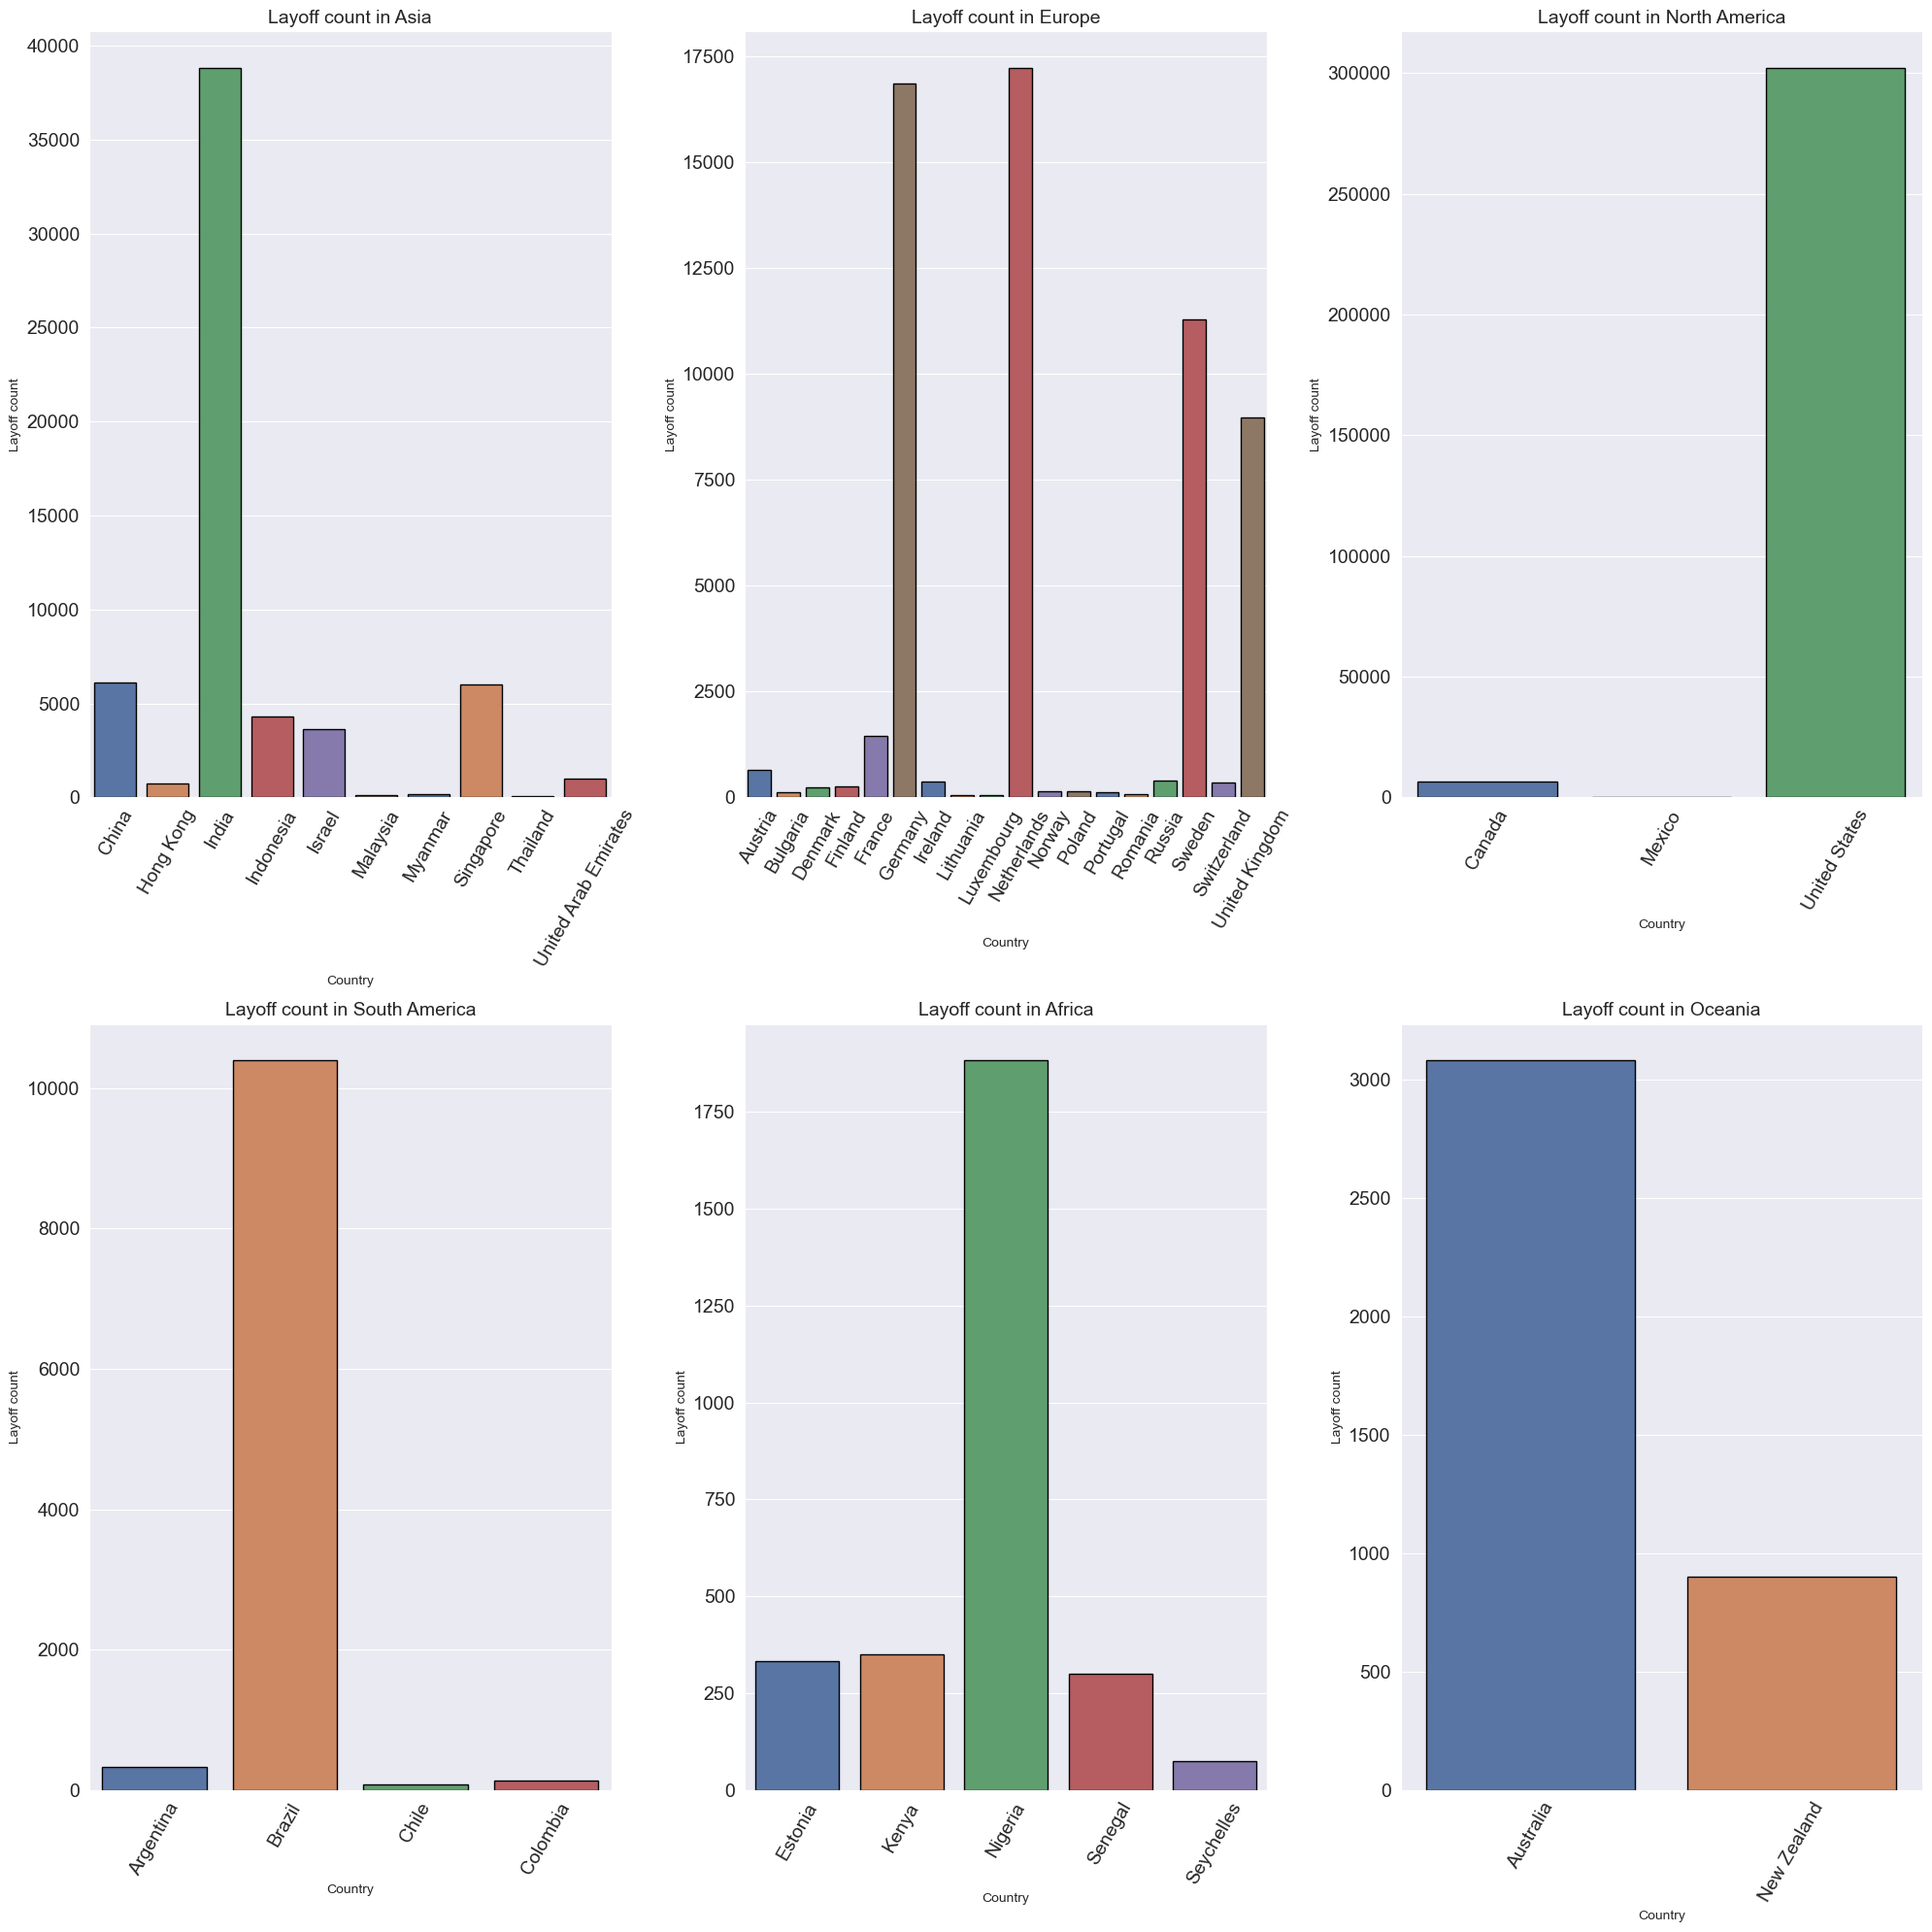

In [50]:
plt.figure(figsize=(20, 20))
sns.set_style('darkgrid')
palette = sns.color_palette('deep', n_colors=6)
plt.subplot(2, 3, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 3, 2)
sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 3, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(2, 3, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 3, 5)
sns.barplot(data=africa_insight, y=africa_insight['Laid_Off_Count'], x=africa_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 3, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Laid_Off_Count'], x=oceania_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

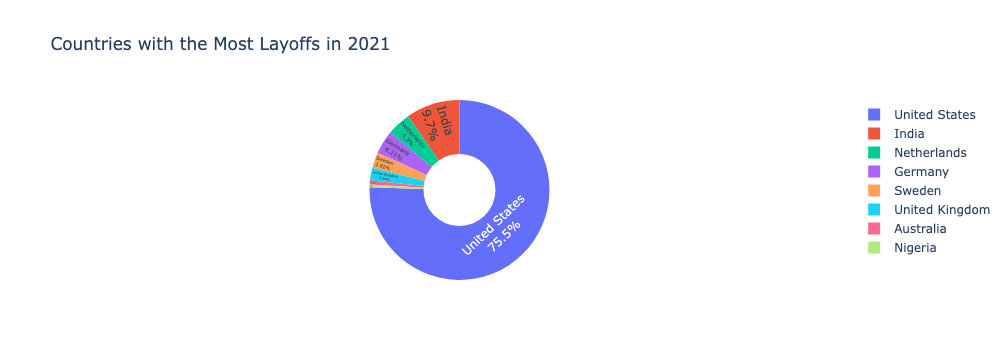

In [51]:
mass_layoff_countries_list = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']
mass_layoff_countries = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(mass_layoff_countries_list)]
fig = px.pie(mass_layoff_countries,
             names='Country',
             values='Laid_Off_Count',
             title='Countries with the Most Layoffs in 2021',
             labels={'Laid_Off_Count': 'Number of Layoffs'},
             hole=0.4)


fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [52]:
top10_comp = layoffs_df.sort_values('Laid_Off_Count', ascending=False)
top10_comp = top10_comp.head(10)
top10_comp

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Country,year,mon-year
467,Google,SF Bay Area,Consumer,12000.0,6.0,2023-01-20,United States,2023,2023-01
940,Meta,SF Bay Area,Consumer,11000.0,13.0,2022-11-09,United States,2022,2022-11
148,Meta,SF Bay Area,Consumer,10000.0,NaN,2023-03-14,United States,2023,2023-03
872,Amazon,Seattle,Retail,10000.0,3.0,2022-11-16,United States,2022,2022-11
500,Microsoft,Seattle,Other,10000.0,5.0,2023-01-18,United States,2023,2023-01
132,Amazon,Seattle,Retail,9000.0,NaN,2023-03-20,United States,2023,2023-03
217,Ericsson,Stockholm,Other,8500.0,8.0,2023-02-24,Sweden,2023,2023-02
641,Salesforce,SF Bay Area,Sales,8000.0,10.0,2023-01-04,United States,2023,2023-01
640,Amazon,Seattle,Retail,8000.0,2.0,2023-01-04,United States,2023,2023-01
24,Flink,Berlin,Food,8000.0,40.0,2023-04-24,Germany,2023,2023-04


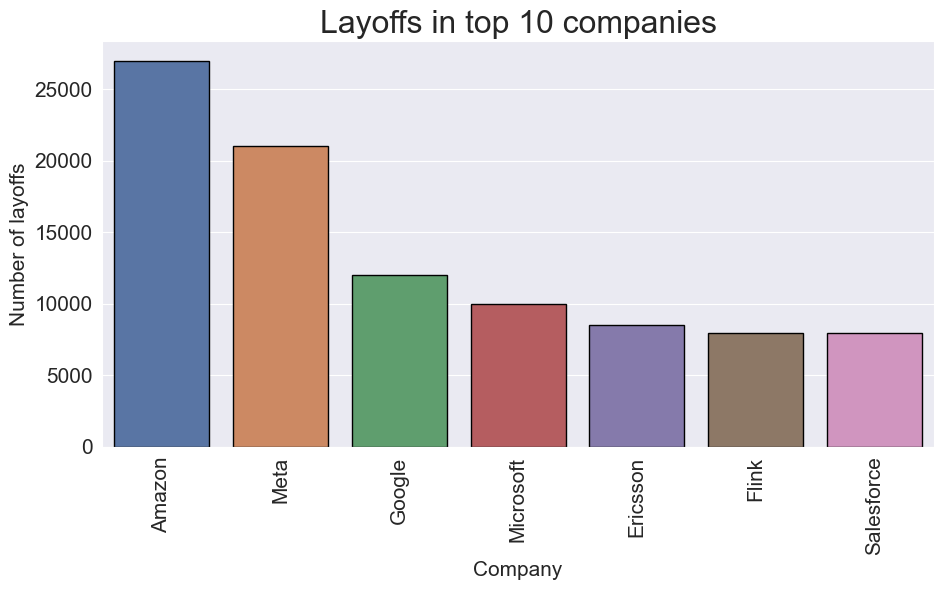

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
sns.barplot(x='Company', y='Laid_Off_Count', data=top10_comp.groupby('Company').sum().sort_values('Laid_Off_Count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='Company', fontsize=15)
plt.ylabel(ylabel='Number of layoffs', fontsize=15)
plt.title('Layoffs in top 10 companies', fontsize=23)

plt.tight_layout()
plt.show()


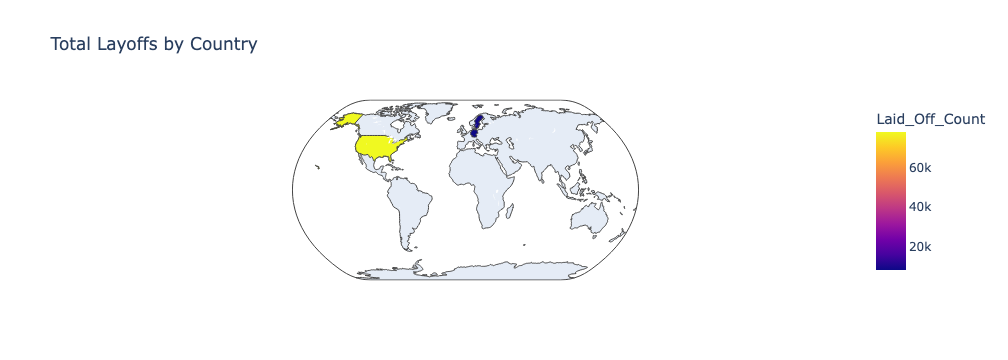

In [54]:
df_agg = top10_comp.groupby(['Country']).agg({'Laid_Off_Count': 'sum'}).reset_index()

fig = px.choropleth(df_agg, locations='Country', locationmode='country names', color='Laid_Off_Count', hover_name='Country', projection='natural earth', title='Total Layoffs by Country')
fig.show()


In [55]:
geolocator = Nominatim(user_agent="my-app")
top10_comp['Latitude'] = top10_comp['Location_HQ'].apply(lambda x: geolocator.geocode(x).latitude if geolocator.geocode(x) else None)
top10_comp['Longitude'] = top10_comp['Location_HQ'].apply(lambda x: geolocator.geocode(x).longitude if geolocator.geocode(x) else None)

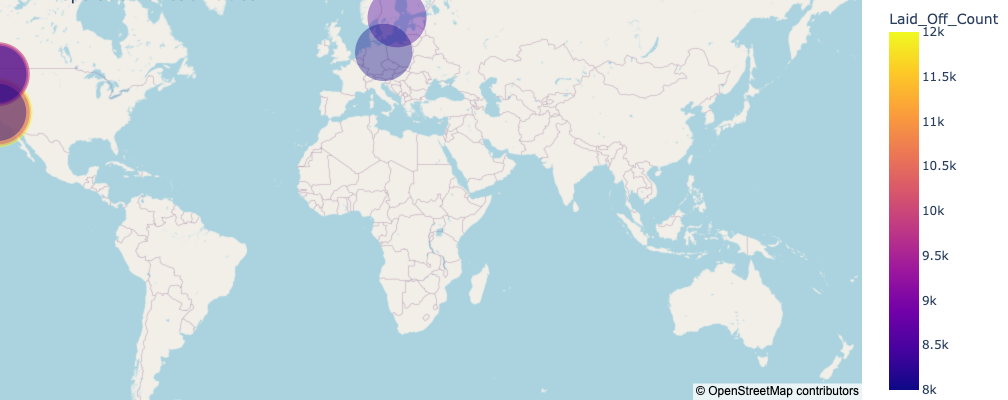

In [57]:

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
top10_comp_fig = px.scatter_mapbox(top10_comp,lat='Latitude',lon='Longitude', hover_name='Location_HQ', hover_data=['Laid_Off_Count', "Company"], 
    color='Laid_Off_Count',
    size="Laid_Off_Count", size_max=50, opacity=0.4,
    center={'lat':10, 'lon':30},
    zoom=1,
    height=400,width=1400,
    mapbox_style="open-street-map")
top10_comp_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
top10_comp_fig.update_layout(title_text="Population of each cities")
top10_comp_fig.show()